--------------------------------------------------------------------------------

# **Problem Statement: Taking three groups of students. In each group, students are studying for different degrees. Our task is to make a model that can help analyze this data.**

# **Initialization**

In [591]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [592]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [593]:
df = pd.read_csv("/content/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# **DATA CLEANING**

In [594]:
#remove rows or columns with missing data (NaN)
df.dropna(inplace = True)

In [595]:
df.rename(columns={'parental level of education': 'level of education'}, inplace=True)

Data Analysis

In [596]:
groups = df.groupby(['race/ethnicity', 'lunch'])
groups.first()

gender  level of education  \
race/ethnicity lunch                                      
group A        free/reduced    male  associate's degree   
               standard        male        some college   
group B        free/reduced    male        some college   
               standard      female   bachelor's degree   
group C        free/reduced    male     master's degree   
               standard      female        some college   
group D        free/reduced    male         high school   
               standard        male  associate's degree   
group E        free/reduced  female     master's degree   
               standard        male        some college   

                            test preparation course  math score  \
race/ethnicity lunch                                              
group A        free/reduced                    none          47   
               standard                   completed          78   
group B        free/reduced                    none          40   
               standard                        none          72   
group C        free/reduced               completed          46   
               standard                   completed          69   
group D        free/reduced               completed          64   
               standard                        none          40   
group E        free/reduced                    none          56   
               standard                        none          97   

                             reading score  writing score  
race/ethnicity lunch                                       
group A        free/reduced             57             44  
               standard                 72             70  
group B        free/reduced             43             39  
               standard                 72             74  
group C        free/reduced             42             46  
               standard                 90             88  
group D        free/reduced             64             67  
               standard                 52             43  
group E        free/reduced             72             65  
               standard                 87             82

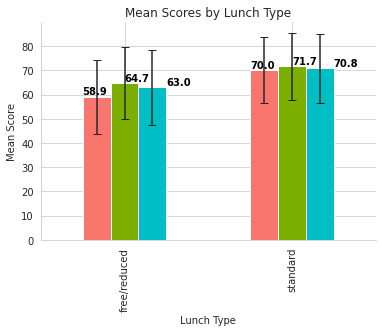

In [597]:
grouped_df = df.groupby(['lunch'])

# calculate the means and standard deviations
mm = grouped_df['math score'].mean()
rm = grouped_df['reading score'].mean()
wm = grouped_df['writing score'].mean()
msd = grouped_df['math score'].std()
rsd = grouped_df['reading score'].std()
wsd = grouped_df['writing score'].std()

# create a DataFrame with the means and standard deviations
mean_df = pd.DataFrame({'Math': mm, 'Reading': rm, 'Writing': wm})
std_df = pd.DataFrame({'Math': msd, 'Reading': rsd, 'Writing': wsd})

# plot the means as a bar chart with error bars
ax = mean_df.plot(kind='bar', yerr=std_df, capsize=4, color=['#F8766D', '#7CAE00', '#00BFC4'], legend=False)

# set the chart title and axis labels
ax.set_title('Mean Scores by Lunch Type')
ax.set_xlabel('Lunch Type')
ax.set_ylabel('Mean Score')

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add annotations to the bars
for i, v in enumerate(mean_df.values):
    ax.text(i - 0.25, v[0] + 1, str(round(v[0], 1)), color='black', fontweight='bold')
    ax.text(i, v[1] + 1, str(round(v[1], 1)), color='black', fontweight='bold')
    ax.text(i + 0.25, v[2] + 1, str(round(v[2], 1)), color='black', fontweight='bold')

# show the plot
plt.show()


In [598]:
#Remove the irrelevant column 'lunch'
df.pop('lunch')

0          standard
1          standard
2          standard
3      free/reduced
4          standard
           ...     
995        standard
996    free/reduced
997    free/reduced
998        standard
999    free/reduced
Name: lunch, Length: 1000, dtype: object

In [599]:
groups = df.groupby(['race/ethnicity','gender'])
groups.first()

level of education test preparation course  math score  \
race/ethnicity gender                                                           
group A        female     master's degree                    none          50   
               male    associate's degree                    none          47   
group B        female   bachelor's degree                    none          72   
               male          some college                    none          40   
group C        female        some college               completed          69   
               male          some college                    none          76   
group D        female     master's degree                    none          62   
               male           high school               completed          64   
group E        female     master's degree                    none          56   
               male          some college                    none          97   

                       reading score  writing score  
race/ethnicity gender                                
group A        female             53             58  
               male               57             44  
group B        female             72             74  
               male               43             39  
group C        female             90             88  
               male               78             75  
group D        female             70             75  
               male               64             67  
group E        female             72             65  
               male               87             82

In [600]:
groups = df.groupby(['level of education'])
groups.first()

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
level of education,,,,,,
associate's degree,male,group A,none,47,57,44
bachelor's degree,female,group B,none,72,72,74
high school,male,group D,completed,64,64,67
master's degree,female,group B,none,90,95,93
some college,female,group C,completed,69,90,88
some high school,female,group C,none,69,75,78


# **EDA**

In [601]:
import scipy.stats as stats
print('math score Zscore\n',stats.zscore(df['math score']))
print('\nreading score Zscore\n',stats.zscore(df['reading score']))
print('\nwriting score Zscore\n',stats.zscore(df['writing score']))

math score Zscore
 0      0.390024
1      0.192076
2      1.577711
3     -1.259543
4      0.653954
         ...   
995    1.445746
996   -0.269803
997   -0.467751
998    0.126093
999    0.719937
Name: math score, Length: 1000, dtype: float64

reading score Zscore
 0      0.193999
1      1.427476
2      1.770109
3     -0.833899
4      0.605158
         ...   
995    2.044215
996   -0.970952
997    0.125472
998    0.605158
999    1.153370
Name: reading score, Length: 1000, dtype: float64

writing score Zscore
 0      0.391492
1      1.313269
2      1.642475
3     -1.583744
4      0.457333
         ...   
995    1.774157
996   -0.859491
997   -0.201079
998    0.589015
999    1.181586
Name: writing score, Length: 1000, dtype: float64


# **Outliers are OUT**

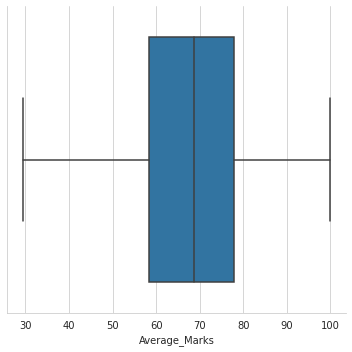

In [602]:
#Remove the outliers using IQR by recalculating IQR in updated ' Average_Marks ' and analyse with boxplot
df['Average_Marks'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).round(2)
desc = df['Average_Marks'].describe()
Q1 = desc['25%']
Q3 = desc['75%']
IQR = (Q3 - Q1).round(3)
dfout = df.query('@lb < Average_Marks < @ub')

df['Average_Marks'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).round(2)

desc = df['Average_Marks'].describe()
Q1 = desc['25%']
Q3 = desc['75%']
IQR = (Q3 - Q1).round(3)

lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

dfout = df.query('@lb < Average_Marks < @ub')
sns.catplot(x='Average_Marks', kind='box', data=dfout)

Zscore: 0      0.343815
1      1.021701
2      1.747306
3     -1.294059
4      0.600653
         ...   
995    1.840638
996   -0.732663
997   -0.194424
998    0.460304
999    1.068718
Name: Average_Marks, Length: 1000, dtype: float64


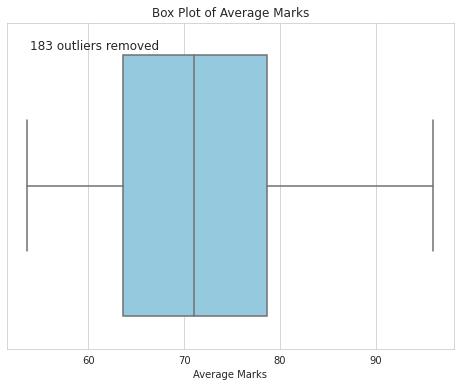

Summary statistics for newdf:
 count    817.000000
mean      71.519290
std       10.140411
min       53.670000
25%       63.670000
50%       71.000000
75%       78.670000
max       96.000000
Name: Average_Marks, dtype: float64


In [603]:
#Remove the outliers using z-score by recalculating z-score in updated ' Average_Marks ' and analyse with boxplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

zscore = stats.zscore(df['Average_Marks'])
print('Zscore:', zscore)

filter = ((zscore > -1) & (zscore < 2))
newdf = df[filter]

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.boxplot(x='Average_Marks', data=newdf, color='skyblue')
plt.xlabel('Average Marks')
plt.title('Box Plot of Average Marks')
plt.text(0.05, 0.95, f'{len(df) - len(newdf)} outliers removed', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top')
plt.show()

print('Summary statistics for newdf:\n', newdf['Average_Marks'].describe())

# **Correlation**

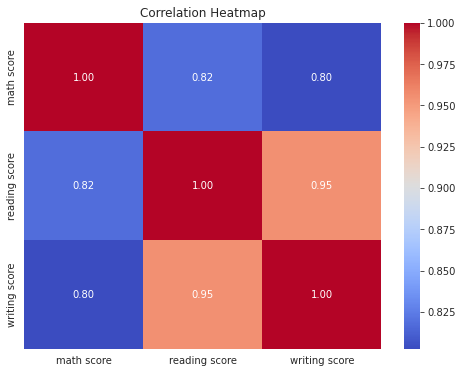

In [604]:
#Plot the heatmap using the correlation
import seaborn as sns
import matplotlib.pyplot as plt

t = df[['math score', 'reading score', 'writing score']]
c = t.corr()

plt.figure(figsize=(8, 6))
sns.set_style('white')
sns.heatmap(c, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Some Other Relational Plots

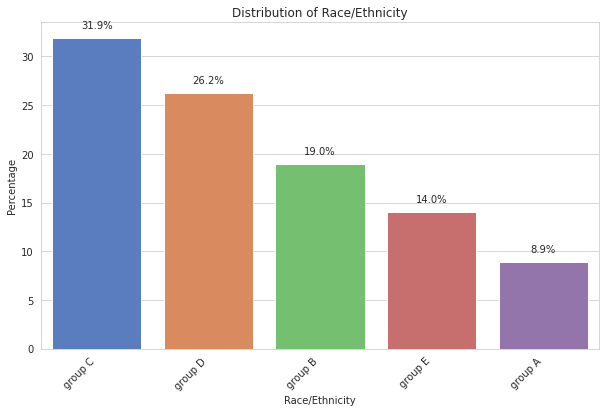

In [605]:
#bar plot with race/ethnicity with its count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
data = df['race/ethnicity'].value_counts(normalize=True) * 100
sns.barplot(x=data.index, y=data.values, palette='muted')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage')
plt.title('Distribution of Race/Ethnicity')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(data.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.show()

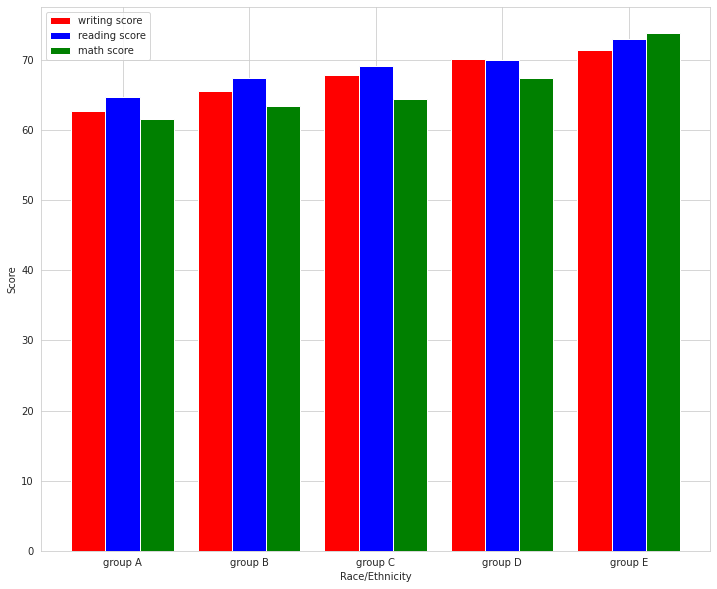

In [606]:
# Get the mean scores for each race/ethnicity group
grouped_df = df.groupby('race/ethnicity')
mean_scores = grouped_df[['writing score', 'reading score', 'math score']].mean()

# Sort the mean scores in descending order
mean_scores = mean_scores.loc[mean_scores.mean(axis=1).sort_values(ascending=True).index]

# Set the number of groups and data points to plot
N = len(mean_scores.index)
M = len(mean_scores.columns)

# Create a new figure with a size of 10x6 inches
plt.figure(figsize=(12, 10))

# Generate the positions of the bars on the x-axis
ind = np.arange(N)
width = 0.09 * M

# Create a bar chart for each subject
colors = ['r', 'b', 'g']
bars = []
for i, col in enumerate(mean_scores.columns):
    bar = plt.bar(ind + i*width, mean_scores[col], width, color=colors[i])
    bars.append(bar)

# Add a legend to the chart
plt.legend(bars, mean_scores.columns)

# Set the x-axis label and tick labels
plt.xlabel('Race/Ethnicity')
plt.xticks(ind + width*(M-1)/2, mean_scores.index)

# Set the y-axis label
plt.ylabel('Score')

# Display the chart
plt.show()

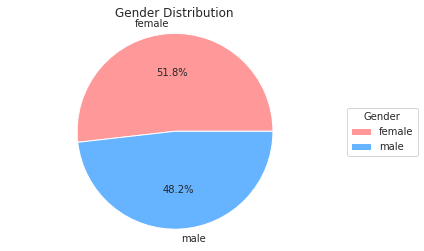

In [607]:
#pie chart with Gender and its count
data = df['gender'].value_counts()

# Define a color palette for the plot
colors = ['#ff9999', '#66b3ff']

# Create the plot
plt.pie(data.values, labels=data.index, autopct="%1.1f%%", colors=colors)
plt.title("Gender Distribution")
plt.legend(title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

--------------

# **KNN - Classification**

In [608]:
#Using columns math, score reading score,	writing score as the independent variables
x=df.iloc[:, 5:8].values
print(x)

[[72.   74.   72.67]
 [90.   88.   82.33]
 [95.   93.   92.67]
 ...
 [71.   65.   65.  ]
 [78.   77.   74.33]
 [86.   86.   83.  ]]


In [609]:
#Encode the categorical value of the target column 'test preparation course' to numerical value
df['test preparation course']= df['test preparation course'].replace({'none':0, 'completed':1})

In [610]:
#Use the target variable as 'test preparation course'
y = df.iloc[:,3].values
print(y)

[0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0
 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 

In [611]:
#train a model on a portion of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [612]:
#scaleing numerical data to a common range
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

In [613]:
#Perform the classification with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print(x_train)
#print(x_test)

[[-1.55960357 -1.17802941 -1.57025701]
 [ 0.61557575  0.39816396  0.71982575]
 [ 1.56721669  1.77733316  1.6780575 ]
 ...
 [ 0.41165268  0.26681451  0.25227595]
 [ 0.41165268  0.59518813  0.67286048]
 [-0.3360652  -0.5869569  -0.70525483]]


In [614]:
#prediction of test preparation course completion
y_pred = knn.predict(x_test)
print(y_test)
print('\n')
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1]


[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0

Logistic Regression: ROC AUC=0.903
Cross-validated accuracy: 0.841 +/- 0.019


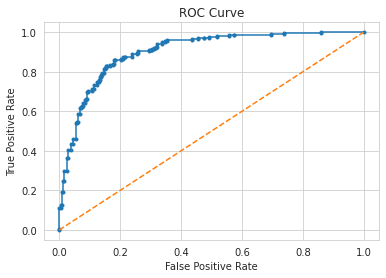

In [615]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, f1_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score


# Generate simulated binary classification data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Split the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2)

# Train a logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_y)

# Evaluate the model's performance on the test set
lr_probs = model.predict_proba(test_X)[:, 1]
lr_auc = roc_auc_score(test_y, lr_probs)
print('Logistic Regression: ROC AUC=%.3f' % lr_auc)

# Use cross-validation to get a more accurate estimate of the model's performance
scores = cross_val_score(model, X, y, cv=5)
print('Cross-validated accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Visualize the ROC curve
fpr, tpr, _ = roc_curve(test_y, lr_probs)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [616]:
# generate some example data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform feature scaling on the independent variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# calculate the recall
recall = recall_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# calculate the specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

f_score = 2 * (precision * recall) / (precision + recall)

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
auc_score = auc(fpr, tpr)

print("Confusion Matrix:\n", cm.round(3))
print("Accuracy:", accuracy.round(3))
print("Recall:", recall.round(3))
print("Precision:", precision.round(3))
print("Specificity:", specificity.round(3))
print("F-score:", f_score.round(3))
print("AUC score:", auc_score.round(3))

Confusion Matrix:
 [[75 14]
 [20 91]]
Accuracy: 0.83
Recall: 0.82
Precision: 0.867
Specificity: 0.843
F-score: 0.843
AUC score: 0.913


# **K-Means Clustering**

In [617]:
from sklearn.cluster import KMeans
wcss=[]

# separate the columns into X (numerical) and categorical (string) columns
X = df[["Average_Marks"]]
categorical = df[["level of education"]]

# perform KMeans clustering on the numerical column
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[203067.6404635998, 72708.98705435859, 38000.96200431278, 24244.651227296148, 15915.394469208972, 11439.835826240942, 8618.740733744426, 6668.391822262203, 5126.03125820332, 4247.23304614711]


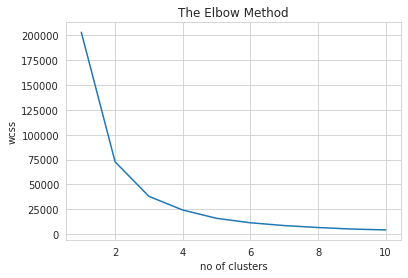

In [618]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


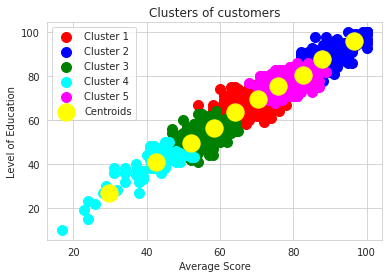

In [619]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
kmeans.fit(x)
centroids = kmeans.cluster_centers_
y_kmeans= kmeansmodel.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Average Score')
plt.ylabel('Level of Education')
plt.legend()
plt.show()
